<a href="https://colab.research.google.com/github/95-sanya-95/Summer_ML_internship/blob/main/machine-learning/week2/YOLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### dnn stands for Deep neural network, here using CV2 we will first make the yolo functions executable through CV

In [ ]:
yolo = cv2.dnn.readNet("/content/yolov3.weights","/content/yolov3.cfg")

In [ ]:
detectable_objects=[]
with open("/content/coco.names","r") as f:
  classes= f.read().splitlines()

In [ ]:
print(classes)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [ ]:
len(classes)

80

So, basically coco.names contain the names of those objects which can be detected by the YOLO algorithm

# Prepare the input before feeding it to YOLO

In [ ]:
img = cv2.imread("/content/depositphotos_1409994-stock-photo-isolated-white-wood-chair.jpg")

In [ ]:
blob = cv2.dnn.blobFromImage(img, 1/255, (320,320), (0,0,0), swapRB=True, crop=False)

The blob array is typically a 4-dimensional array that represents the preprocessed image in a format suitable for input to a neural network. By accessing the first element, this line retrieves the preprocessed image data.

In [ ]:
blob

array([[[[1., 1., 1., ..., 1., 1., 1.],
         [1., 1., 1., ..., 1., 1., 1.],
         [1., 1., 1., ..., 1., 1., 1.],
         ...,
         [1., 1., 1., ..., 1., 1., 1.],
         [1., 1., 1., ..., 1., 1., 1.],
         [1., 1., 1., ..., 1., 1., 1.]],

        [[1., 1., 1., ..., 1., 1., 1.],
         [1., 1., 1., ..., 1., 1., 1.],
         [1., 1., 1., ..., 1., 1., 1.],
         ...,
         [1., 1., 1., ..., 1., 1., 1.],
         [1., 1., 1., ..., 1., 1., 1.],
         [1., 1., 1., ..., 1., 1., 1.]],

        [[1., 1., 1., ..., 1., 1., 1.],
         [1., 1., 1., ..., 1., 1., 1.],
         [1., 1., 1., ..., 1., 1., 1.],
         ...,
         [1., 1., 1., ..., 1., 1., 1.],
         [1., 1., 1., ..., 1., 1., 1.],
         [1., 1., 1., ..., 1., 1., 1.]]]], dtype=float32)

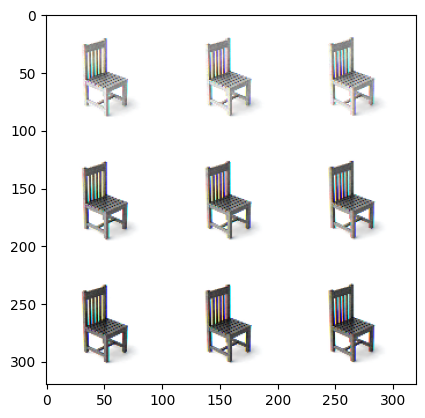

In [ ]:
i = blob[0].reshape(320,320,3) # 320, 320 is the size of the image and the 3 are the channels in it
plt.imshow(i)

In [ ]:
yolo.setInput(blob)

In [ ]:
output_layers_name= yolo.getUnconnectedOutLayersNames()
layeroutput = yolo.forward(output_layers_name)

In [ ]:
layeroutput

(array([[0.05    , 0.05    , 0.3625  , ..., 0.25    , 0.25    , 0.25    ],
        [0.05    , 0.05    , 0.4875  , ..., 0.25    , 0.25    , 0.25    ],
        [0.05    , 0.05    , 1.165625, ..., 0.25    , 0.25    , 0.25    ],
        ...,
        [0.95    , 0.95    , 0.3625  , ..., 0.25    , 0.25    , 0.25    ],
        [0.95    , 0.95    , 0.4875  , ..., 0.25    , 0.25    , 0.25    ],
        [0.95    , 0.95    , 1.165625, ..., 0.25    , 0.25    , 0.25    ]],
       dtype=float32),
 array([[0.025   , 0.025   , 0.09375 , ..., 0.25    , 0.25    , 0.25    ],
        [0.025   , 0.025   , 0.19375 , ..., 0.25    , 0.25    , 0.25    ],
        [0.025   , 0.025   , 0.184375, ..., 0.25    , 0.25    , 0.25    ],
        ...,
        [0.975   , 0.975   , 0.09375 , ..., 0.25    , 0.25    , 0.25    ],
        [0.975   , 0.975   , 0.19375 , ..., 0.25    , 0.25    , 0.25    ],
        [0.975   , 0.975   , 0.184375, ..., 0.25    , 0.25    , 0.25    ]],
       dtype=float32),
 array([[0.0125  , 0.0125 

In [ ]:
boxes = []
confidences = []
class_ids = []

width = 320
height = 320

for output in layeroutput:
  for detection in output:
    scores = detection[5:]
    class_id = np.argmax(scores)
    confidence = scores[class_id]
    if confidence > 0.3:
      center_x = int(detection[0] * width)
      center_y = int(detection[1] * height)
      w = int(detection[2] * width)
      h = int(detection[3] * height)

      x = int(center_x - w/2)
      y = int(center_y - h/2)

      boxes.append([x, y, w, h])
      confidences.append(float(confidence))
      class_ids.append(class_id)

In [ ]:
len(boxes)

0